### CLUSTERING


In [21]:
import pandas as pd
import pickle
import os 
os.chdir("C:/Users/zemar/OneDrive/Ambiente de Trabalho/drug_sensitivity-main")
# drugs
drugs = pd.read_csv('./data/drugs.csv', index_col=1)
drugs.drop(['Unnamed: 0'], axis=1, inplace=True)

# cell lines
cell_lines = pd.read_csv('./data/gene_expression.csv', index_col=0)

# combinations
combinations = pd.read_csv('./data/combinations.csv', index_col=0)


with open('./data/2128_genes.pkl', 'rb') as f:
    top_genes = pickle.load(f)

df_hc = cell_lines[cell_lines.columns.intersection(top_genes)]



print(df_hc)

            FUCA2      GCLC     STPG1   CYP26B1    NDUFAB1     ABCB5   
HCC1954  7.553067  9.280913  3.372573  3.777488  10.985991  2.902166  \
HCC1143  8.440833  8.005206  3.920152  3.210161  10.541755  2.877320   
HCC1187  5.551352  5.032812  3.528140  3.247300  10.967920  2.934802   
HCC1395  8.245466  5.650228  4.185011  3.259254  11.115642  2.933936   
HCC1599  7.464137  6.321866  3.531019  5.513162  11.556747  2.998914   
...           ...       ...       ...       ...        ...       ...   
NCC010   8.031837  6.249088  3.978721  2.909780  11.181177  2.976709   
RCC-JW   7.988237  4.217507  3.394038  2.684415  10.388300  3.006199   
MM1S     6.453126  5.564713  3.394151  3.028858  11.651180  3.102640   
SNU-61   8.947314  6.013510  3.725530  3.029182  11.244912  3.123017   
HCC202   7.069704  6.405211  3.458080  3.007654  11.139008  3.040279   

             DVL2    HOXA11     COPZ2    CREBBP  ...  ATP6V1E2    ZNF345   
HCC1954  4.193197  3.967413  3.356586  5.688428  ...  5.120

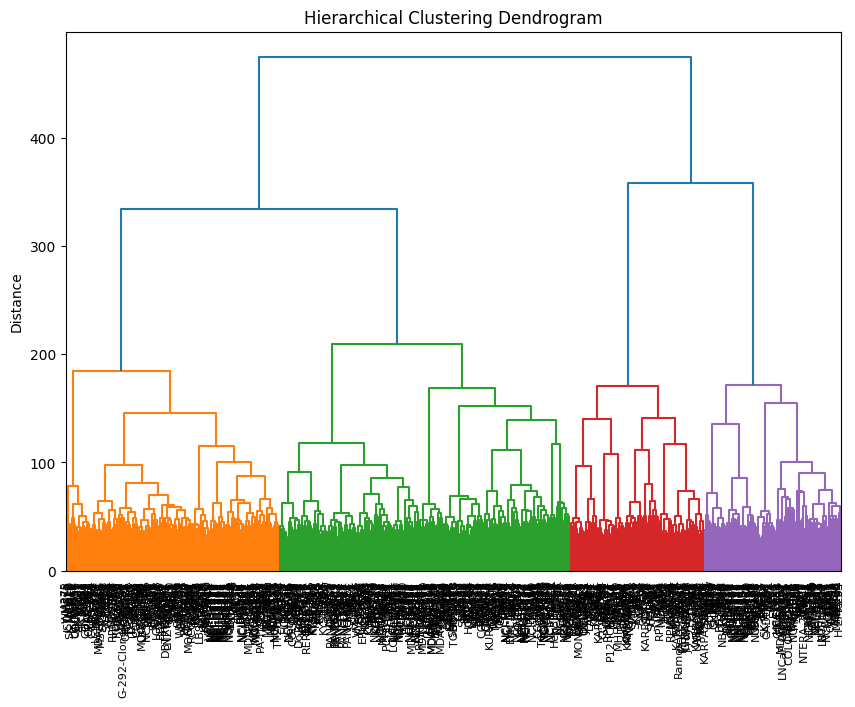

In [22]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
 
# hierarchical clustering
Z = linkage(df_hc, method='ward')

# plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, labels=df_hc.index, leaf_rotation=90, leaf_font_size=8)
plt.ylabel('Distance')
plt.show()



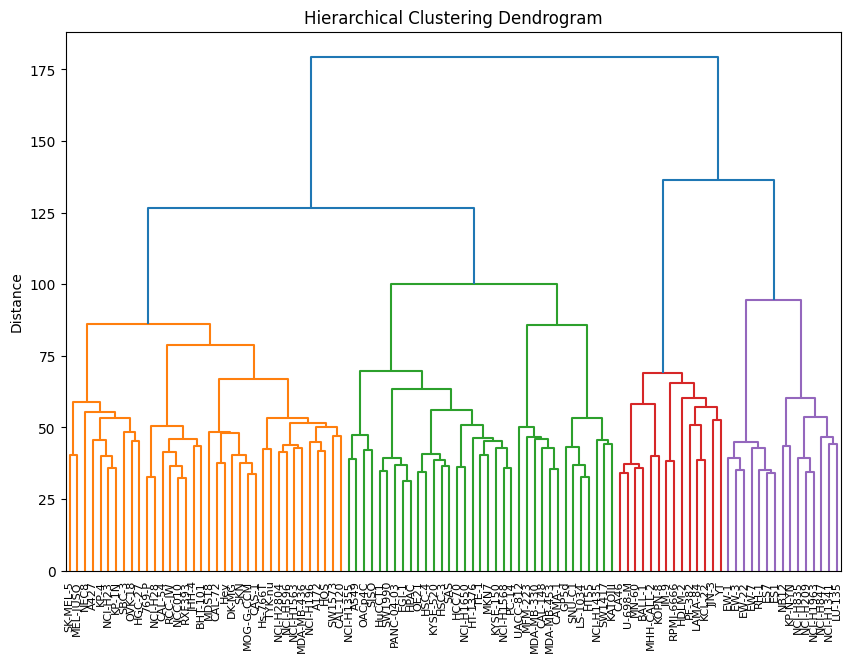

In [23]:
# here we sampled the Dataframe so that we can have good interpretability
sampled_df = df_hc.sample(n=100, random_state=42)

# hierarchical clustering
Z = linkage(sampled_df, method='ward')

# plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, labels=sampled_df.index, leaf_rotation=90, leaf_font_size=8)
plt.ylabel('Distance')
plt.show()

KeyError: 'NCI-H2804'

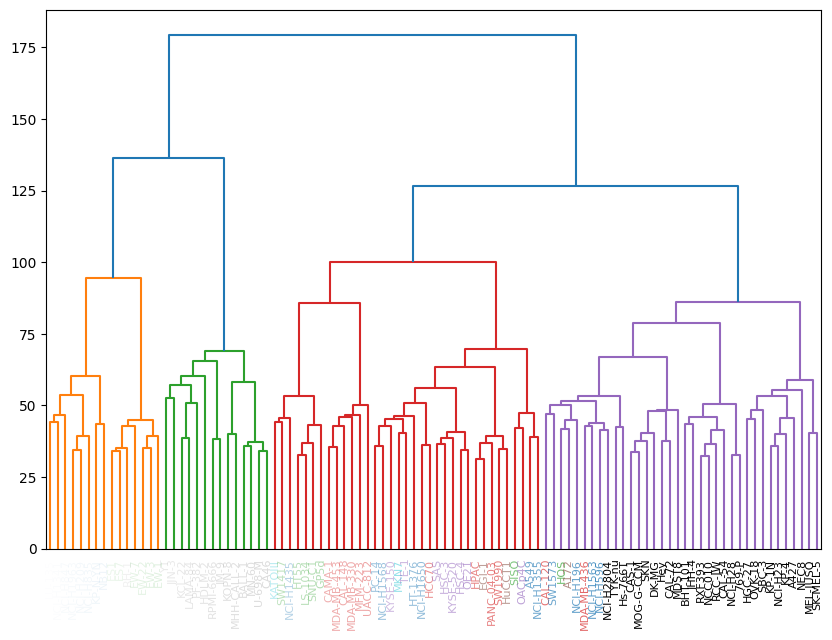

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.colors import rgb2hex, to_rgba
import random

tissue_data = pd.read_excel('./data/tissue.xlsx', index_col=0)
linked = linkage(sampled_df, 'ward')
unique_sites = tissue_data['Site'].unique()
palette = sns.color_palette("tab10", len(unique_sites)) 

# color dictionary 
color_dict = {tissue: rgb2hex(color) for tissue, color in zip(unique_sites, palette)}
#print(color_dict)

# mapping each cell line to its tissue color
tissue_colors = tissue_data.set_index('Line.1')['Site'].map(color_dict)

plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    orientation='top',
                    labels=sampled_df.index,
                    distance_sort='descending',
                    show_leaf_counts=True,
                    leaf_rotation=90,
                    leaf_font_size=8,
                    )

# apply gradient 
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
num_labels = len(xlbls)
for i, lbl in enumerate(xlbls):
    lbl.set_color(to_rgba(tissue_colors[lbl.get_text()], alpha=(i + 1) / num_labels))

plt.show()

## K-MEANS CLUSTERING


c:\Users\zemar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


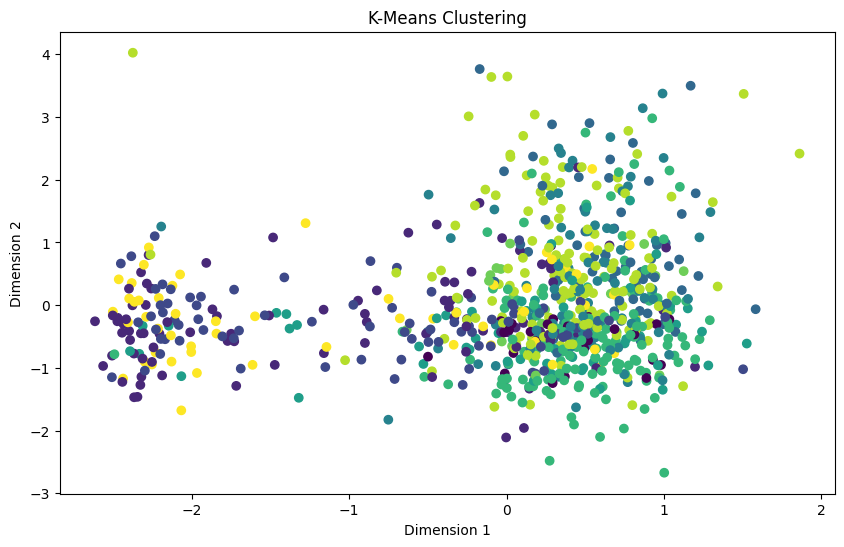

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_numeric = df_hc.select_dtypes(include=['number'])

# scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

# apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=0)  
clusters = kmeans.fit_predict(scaled_df)
df_numeric['Cluster'] = clusters


# creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df_numeric['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## K-MEANS (ELBOW METHOD)

c:\Users\zemar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zemar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zemar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zemar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

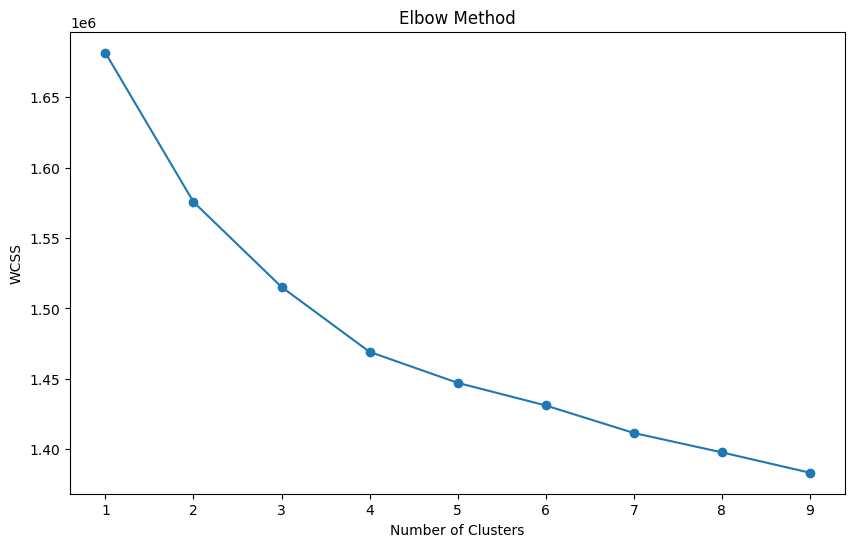

In [26]:
wcss = []
for i in range(1, 10): 
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o') 
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()